In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [2]:
population = pd.read_csv("fr_population.csv")
cereal = pd.read_csv("fr_cereales.csv")
sous_alimentation = pd.read_csv('fr_sousalimentation.csv')
vegetal = pd.read_csv('fr_vegetaux.csv')
animal = pd.read_csv('fr_animaux.csv')

In [3]:
# création d'une colonne type dans les dataframes 
vegetal['Type'] = 'vegetal'
animal['Type'] = 'animal'
cereal['is_cereal'] = True

vegetal = vegetal[vegetal['Zone'] != 'Chine' ].copy()
animal = animal[animal['Zone'] != 'Chine'].copy()
population = population[population['Zone'] != 'Chine'].copy()

#Union des deux Dataframes animal et vegetal
main_df = pd.concat([animal, vegetal])
# Création d'un tableau croisé dynamique
main_df = main_df.pivot_table(index=['Zone','Produit','Code Produit', 'Type','Code zone', 'Année'], columns='Élément', values=['Valeur'] )
main_df = main_df.reset_index()
anim_vegetal = main_df.copy()
# Ajout du dataframe Population
main_df = main_df.merge(population, on='Zone', how="left")
#Ajout du dataframe cereal
# remplacer les valeurs manquantes par 0
main_df.fillna(0, inplace=True)
main_df['Code produit'] = main_df['Code Produit','']
main_df

,Zone,"(Zone, )","(Produit, )","(Code Produit, )","(Type, )","(Code zone, )","(Année, )","(Valeur, Aliments pour animaux)","(Valeur, Autres utilisations (non alimentaire))","(Valeur, Disponibilité alimentaire (Kcal/personne/jour))",...,Élément,Code Produit,Produit,Code année,Année,Unité,Valeur,Symbole,Description du Symbole,Code produit
0,Afghanistan,Afghanistan,Abats Comestible,2736,animal,2,2013,0.0,0.0,5.0,...,Population totale,2501,Population,2013,2013,1000 personnes,30552,0,Donnée officielle,2736
1,Afghanistan,Afghanistan,"Agrumes, Autres",2614,vegetal,2,2013,0.0,0.0,1.0,...,Population totale,2501,Population,2013,2013,1000 personnes,30552,0,Donnée officielle,2614
2,Afghanistan,Afghanistan,Aliments pour enfants,2680,vegetal,2,2013,0.0,0.0,1.0,...,Population totale,2501,Population,2013,2013,1000 personnes,30552,0,Donnée officielle,2680
3,Afghanistan,Afghanistan,Ananas,2618,vegetal,2,2013,0.0,0.0,0.0,...,Population totale,2501,Population,2013,2013,1000 personnes,30552,0,Donnée officielle,2618
4,Afghanistan,Afghanistan,Bananes,2615,vegetal,2,2013,0.0,0.0,4.0,...,Population totale,2501,Population,2013,2013,1000 personnes,30552,0,Donnée officielle,2615
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15600,Îles Salomon,Îles Salomon,Viande de Suides,2733,animal,25,2013,0.0,0.0,45.0,...,Population totale,2501,Population,2013,2013,1000 personnes,561,0,Donnée officielle,2733
15601,Îles Salomon,Îles Salomon,Viande de Volailles,2734,animal,25,2013,0.0,0.0,11.0,...,Population totale,2501,Population,2013,2013,1000 personnes,561,0,Donnée officielle,2734
15602,Îles Salomon,Îles Salomon,"Viande, Autre",2735,animal,25,2013,0.0,0.0,0.0,...,Population totale,2501,Population,2013,2013,1000 personnes,561,0,Donnée officielle,2735
15603,Îles Salomon,Îles Salomon,Vin,2655,vegetal,25,2013,0.0,0.0,0.0,...,Population totale,2501,Population,2013,2013,1000 personnes,561,0,Donnée officielle,2655


# Question 15 : 

In [4]:
population =population.rename(columns = {'Code zone': 'code_pays', 'Zone': 'pays', 'Année': 'annee', 'Valeur': 'population'})
population['population'] = population['population'] * 1000
population.drop(['Code Domaine', 'Domaine', 'Code Élément','Élément','Code Produit', 'Produit', 'Code année','Unité', 'Symbole', 'Description du Symbole'], axis = 1, inplace = True)
population

,code_pays,pays,annee,population
0,2,Afghanistan,2013,30552000
1,202,Afrique du Sud,2013,52776000
2,3,Albanie,2013,3173000
3,4,Algérie,2013,39208000
4,79,Allemagne,2013,82727000
...,...,...,...,...
170,236,Venezuela (République bolivarienne du),2013,30405000
171,237,Viet Nam,2013,91680000
172,249,Yémen,2013,24407000
173,251,Zambie,2013,14539000


In [5]:
population.to_csv("population.csv", index = False, encoding="utf-8")

La clé primaire ici pourrait être code_pays

# Question 16: 

In [6]:
anim_vegetal.fillna(0, inplace = True)
dispo_alim = anim_vegetal.copy()
dispo_alim.drop(('Valeur','Aliments pour animaux'), axis=1, inplace= True)
dispo_alim.drop([('Valeur','Autres utilisations (non alimentaire)'),
                 ('Valeur', 'Disponibilité intérieure'),
                 ('Valeur', 'Exportations - Quantité'),
                 ('Valeur', 'Importations - Quantité'),
                 ('Valeur', 'Pertes'),
                 ('Valeur', 'Production'),
                 ('Valeur', 'Semences'),
                 ('Valeur', 'Traitement'),
                 ('Valeur', 'Variation de stock')
                ], axis=1, inplace= True)

dispo_alim = dispo_alim.rename(columns = {
                                        'Code zone': 'code_pays',
                                        'Zone': 'pays',
                                        'Année': 'annee',
                                        'Produit': 'produit',
                                        'Code Produit': 'code_produit',
                                        'Type': 'origin',
                                        })

dispo_alim['dispo_alim_kcal_p_j'] = dispo_alim['Valeur', 'Disponibilité alimentaire (Kcal/personne/jour)']
dispo_alim['dispo_alim_tonnes'] = dispo_alim['Valeur', 'Nourriture'] * 1000
dispo_alim['dispo_mat_gr'] = dispo_alim['Valeur', 'Disponibilité de matière grasse en quantité (g/personne/jour)']
dispo_alim['dispo_prot'] = dispo_alim['Valeur', 'Disponibilité de protéines en quantité (g/personne/jour)']

dispo_alim.drop([('Valeur','Disponibilité alimentaire (Kcal/personne/jour)'),
                 ('Valeur', 'Nourriture'),
                 ('Valeur', 'Disponibilité de matière grasse en quantité (g/personne/jour)'),
                 ('Valeur', 'Disponibilité de protéines en quantité (g/personne/jour)')
                ], axis=1, inplace= True)
dispo_alim.drop([('Valeur','Disponibilité alimentaire en quantité (kg/personne/an)')], axis=1, inplace= True)
dispo_alim

,pays,produit,code_produit,origin,code_pays,annee,dispo_alim_kcal_p_j,dispo_alim_tonnes,dispo_mat_gr,dispo_prot
Élément,,,,,,,,,,
0,Afghanistan,Abats Comestible,2736,animal,2,2013,5.0,53000.0,0.20,0.77
1,Afghanistan,"Agrumes, Autres",2614,vegetal,2,2013,1.0,39000.0,0.01,0.02
2,Afghanistan,Aliments pour enfants,2680,vegetal,2,2013,1.0,2000.0,0.01,0.03
3,Afghanistan,Ananas,2618,vegetal,2,2013,0.0,0.0,0.00,0.00
4,Afghanistan,Bananes,2615,vegetal,2,2013,4.0,82000.0,0.02,0.05
...,...,...,...,...,...,...,...,...,...,...
15600,Îles Salomon,Viande de Suides,2733,animal,25,2013,45.0,3000.0,4.28,1.41
15601,Îles Salomon,Viande de Volailles,2734,animal,25,2013,11.0,2000.0,0.69,1.14
15602,Îles Salomon,"Viande, Autre",2735,animal,25,2013,0.0,0.0,0.00,0.04


In [7]:
dispo_alim.to_csv('dispo_alim.csv', index= False , encoding="utf-8")

La clée primaire ici pourrait être (code_pays, code_produit)

# Question 17 :

In [8]:
equilibre_prod = anim_vegetal.copy()
equilibre_prod.drop([
                 ('Valeur', 'Disponibilité alimentaire (Kcal/personne/jour)'),
                 ('Valeur', 'Disponibilité de matière grasse en quantité (g/personne/jour)'),
                 ('Valeur', 'Disponibilité de protéines en quantité (g/personne/jour)'),
                 ('Valeur', 'Production'),
                     'Type'
                ], axis=1, inplace= True)

equilibre_prod = equilibre_prod.rename(columns = {
                                        'Code zone': 'code_pays',
                                        'Zone': 'pays',
                                        'Année': 'annee',
                                        'Produit': 'produit',
                                        'Code Produit': 'code_produit',
                                        })

equilibre_prod['dispo_int'] = equilibre_prod['Valeur', 'Disponibilité intérieure']
equilibre_prod['alim_ani'] = equilibre_prod['Valeur', 'Aliments pour animaux']
equilibre_prod['pertes'] = equilibre_prod['Valeur', 'Pertes']
equilibre_prod['semences'] = equilibre_prod['Valeur', 'Semences']
equilibre_prod['transfo'] = equilibre_prod['Valeur', 'Traitement']
equilibre_prod['nourriture'] = equilibre_prod['Valeur', 'Nourriture']
equilibre_prod['autres_utilisations'] = equilibre_prod['Valeur', 'Autres utilisations (non alimentaire)']



equilibre_prod.drop([('Valeur','Disponibilité intérieure'),
                 ('Valeur', 'Aliments pour animaux'),
                 ('Valeur', 'Semences'),
                 ('Valeur', 'Pertes'),
                 ('Valeur', 'Traitement'),
                 ('Valeur', 'Autres utilisations (non alimentaire)'),
                ], axis=1, inplace= True)

equilibre_prod.drop([
                     ('Valeur','Disponibilité alimentaire en quantité (kg/personne/an)'),
                     ('Valeur','Exportations - Quantité'),
                     ('Valeur','Importations - Quantité'),
                     ('Valeur','Nourriture'),
                     ('Valeur','Variation de stock')
                    ], axis=1, inplace= True)

equilibre_prod

,pays,produit,code_produit,code_pays,annee,dispo_int,alim_ani,pertes,semences,transfo,nourriture,autres_utilisations
Élément,,,,,,,,,,,,
0,Afghanistan,Abats Comestible,2736,2,2013,53.0,0.0,0.0,0.0,0.0,53.0,0.0
1,Afghanistan,"Agrumes, Autres",2614,2,2013,41.0,0.0,2.0,0.0,0.0,39.0,0.0
2,Afghanistan,Aliments pour enfants,2680,2,2013,2.0,0.0,0.0,0.0,0.0,2.0,0.0
3,Afghanistan,Ananas,2618,2,2013,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Afghanistan,Bananes,2615,2,2013,82.0,0.0,0.0,0.0,0.0,82.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
15600,Îles Salomon,Viande de Suides,2733,25,2013,3.0,0.0,0.0,0.0,0.0,3.0,0.0
15601,Îles Salomon,Viande de Volailles,2734,25,2013,2.0,0.0,0.0,0.0,0.0,2.0,0.0
15602,Îles Salomon,"Viande, Autre",2735,25,2013,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [9]:
equilibre_prod.to_csv('equilibre_prod.csv', index=False, encoding="utf-8")

la clé primaire ici pourrait être (code_pays, code_produit)

# Question 18 : 

In [10]:
df_10 = sous_alimentation
df_10[df_10['Valeur'] == '<0.1'] = 0
df_10['Valeur'] = pd.to_numeric(df_10['Valeur'])
df_10.fillna(0, inplace = True)


df_10['population'] = df_10['Valeur'] * 1000000
df_10 = df_10[df_10['Année'] == '2012-2014']
df_10 = df_10[df_10['Zone'] != 'Chine']
df_10.drop(['Code Domaine', 'Domaine', 'Code Élément','Élément','Code Produit', 'Produit', 'Code année','Unité','Valeur', 'Note', 'Symbole', 'Description du Symbole'], axis = 1, inplace = True)
df_10 = df_10.rename(columns = {'Code zone': 'code_pays', 'Zone': 'pays', 'Année': 'annee', 'population': 'nb_personnes'})
df_10

,code_pays,pays,annee,nb_personnes
0,2,Afghanistan,2012-2014,7900000.0
5,202,Afrique du Sud,2012-2014,2600000.0
10,3,Albanie,2012-2014,200000.0
15,4,Algérie,2012-2014,1700000.0
20,79,Allemagne,2012-2014,0.0
...,...,...,...,...
995,236,Venezuela (République bolivarienne du),2012-2014,1900000.0
1000,237,Viet Nam,2012-2014,10400000.0
1005,249,Yémen,2012-2014,7200000.0
1010,251,Zambie,2012-2014,7000000.0


 La clée primaire pourrait être code_pays

In [11]:
df_10.to_csv('sous_nutrition.csv', index =False , encoding="utf-8")

# Question 19 :

Les 10 pays ayant le plus haut ratio disponibilité alimentaire/habitant  en termes de kcal par habitant

<font color='darkbleue'>SELECT</font> pays, <font color='darkbleue'>SUM</font> (dispo_alim_kcal_p_j)
   <font color='darkbleue'>AS</font> dispo_alim_kcal_p_j  
    <font color='darkbleue'>FROM</font> dispo_alim 
    <font color='darkbleue'>GROUP BY</font> pays 
    <font color='darkbleue'>ORDER BY</font> dispo_alim_kcal_p_j 
    <font color='darkbleue'>DESC LIMIT</font> DESC LIMIT 10;


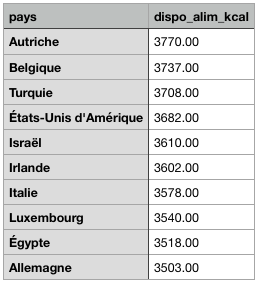

Les 10 pays ayant le plus haut ratio disponibilité alimentaire/habitant  en termes de protéines par habitant

 <font color='darkbleue'>SELECT</font> pays,  <font color='darkbleue'>SUM</font>(dispo_prot/ 1000)  <font color='darkbleue'>AS</font> dispo_prot   <font color='darkbleue'>FROM</font> dispo_alim  <font color='darkbleue'>GROUP BY</font> pays  <font color='darkbleue'>ORDER BY</font> dispo_prot  <font color='darkbleue'>DESC LIMIT</font> 10;


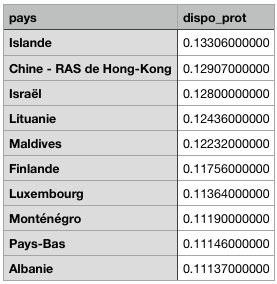

Pour l'année 2013, les 10 pays ayant le plus faible ratio disponibilité alimentaire/habitant en termes de protéines (en kg) par habitant

 <font color='darkbleue'>SELECT</font> pays,  <font color='darkbleue'>SUM</font>(dispo_prot/ 1000 * 365)  <font color='darkbleue'>AS</font> dispo_prot   <font color='darkbleue'>FROM</font> dispo_alim  <font color='darkbleue'>GROUP BY</font> pays  <font color='darkbleue'>ORDER BY</font> dispo_prot  <font color='darkbleue'>ASC LIMIT</font> 10;


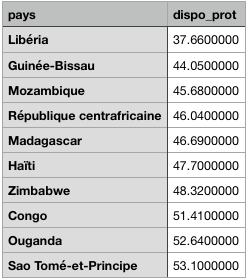

La quantité totale (en kg) de produits perdus par pays en 2013

 <font color='darkbleue'>SELECT</font> pays,  <font color='darkbleue'>SUM</font>(pertes * 1000000 )  <font color='darkbleue'>AS</font> pertes  <font color='darkbleue'>FROM</font> equilibre_prod   <font color='darkbleue'>GROUP BY</font> pays  <font color='darkbleue'>ORDER BY</font> pertes;


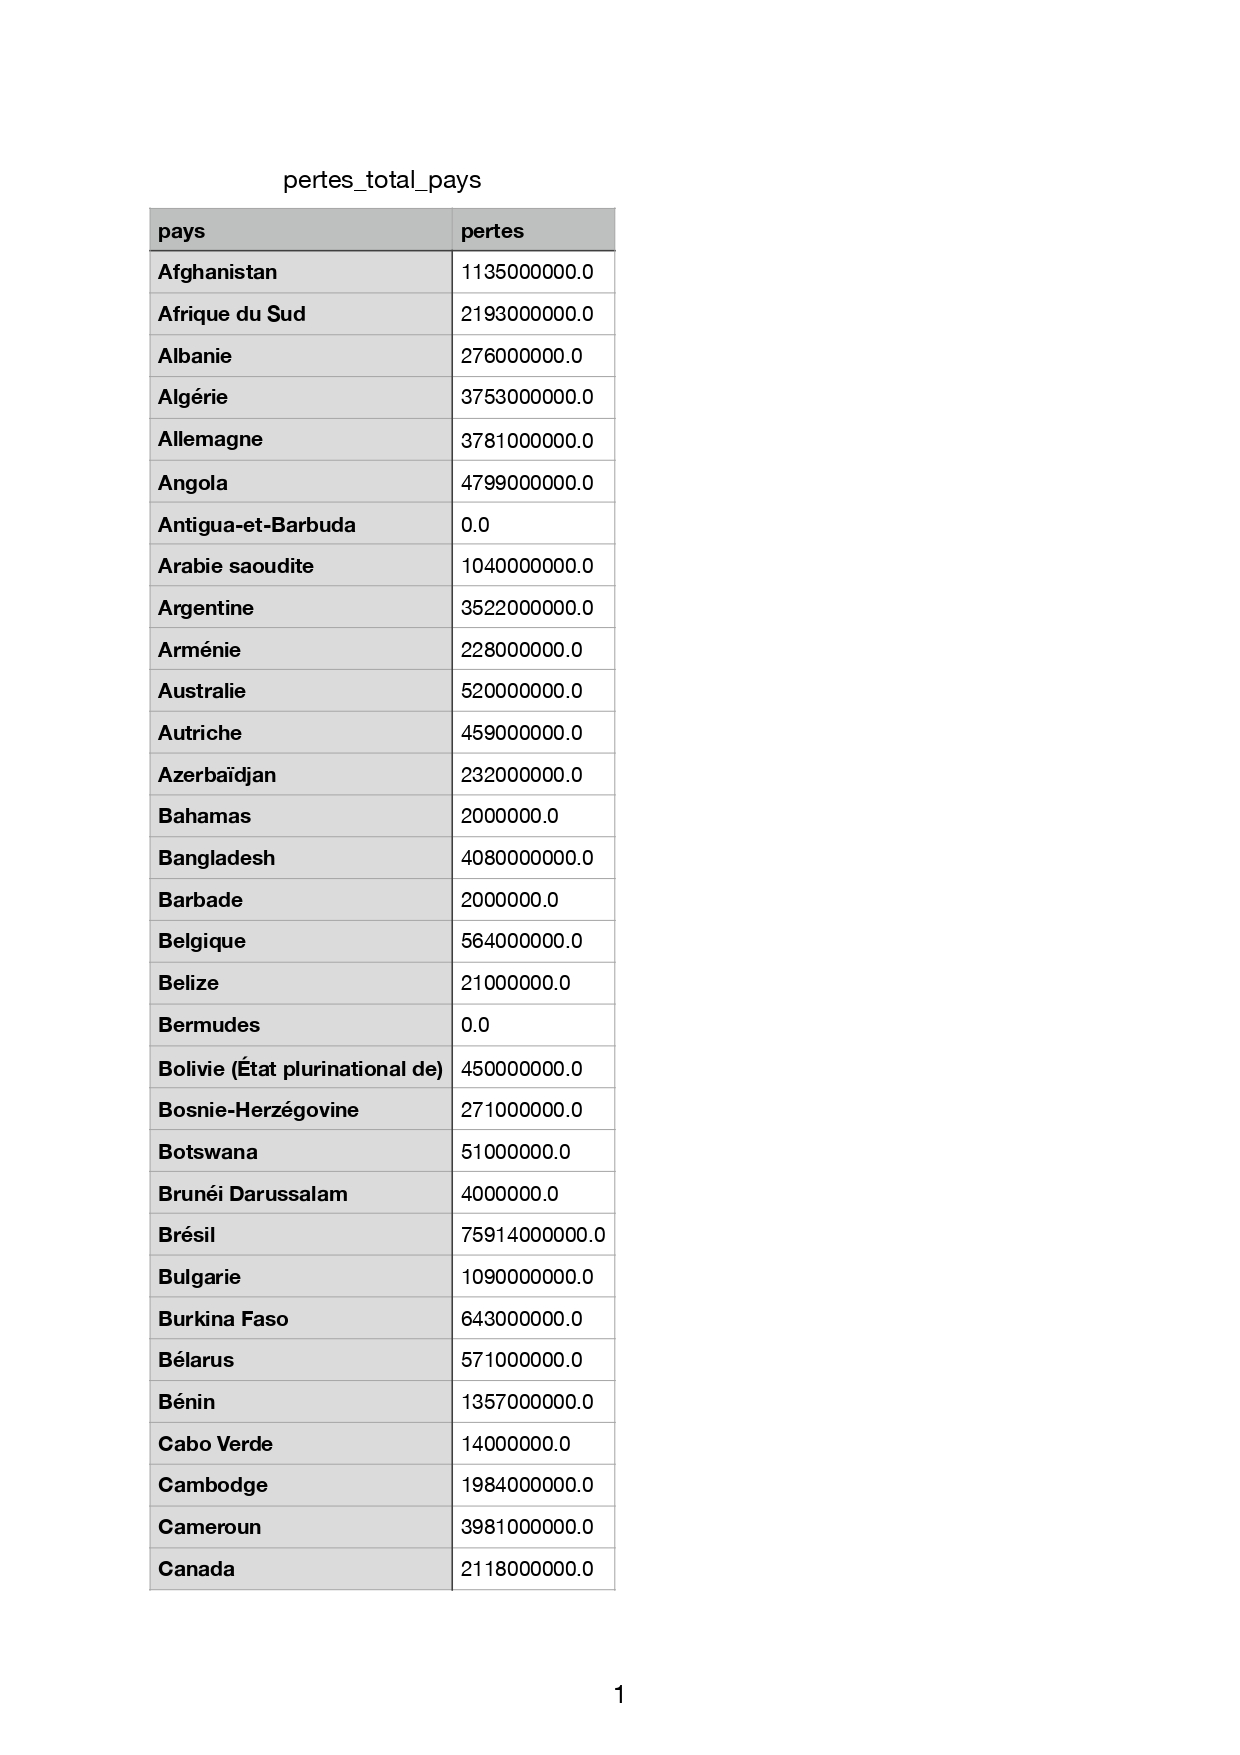

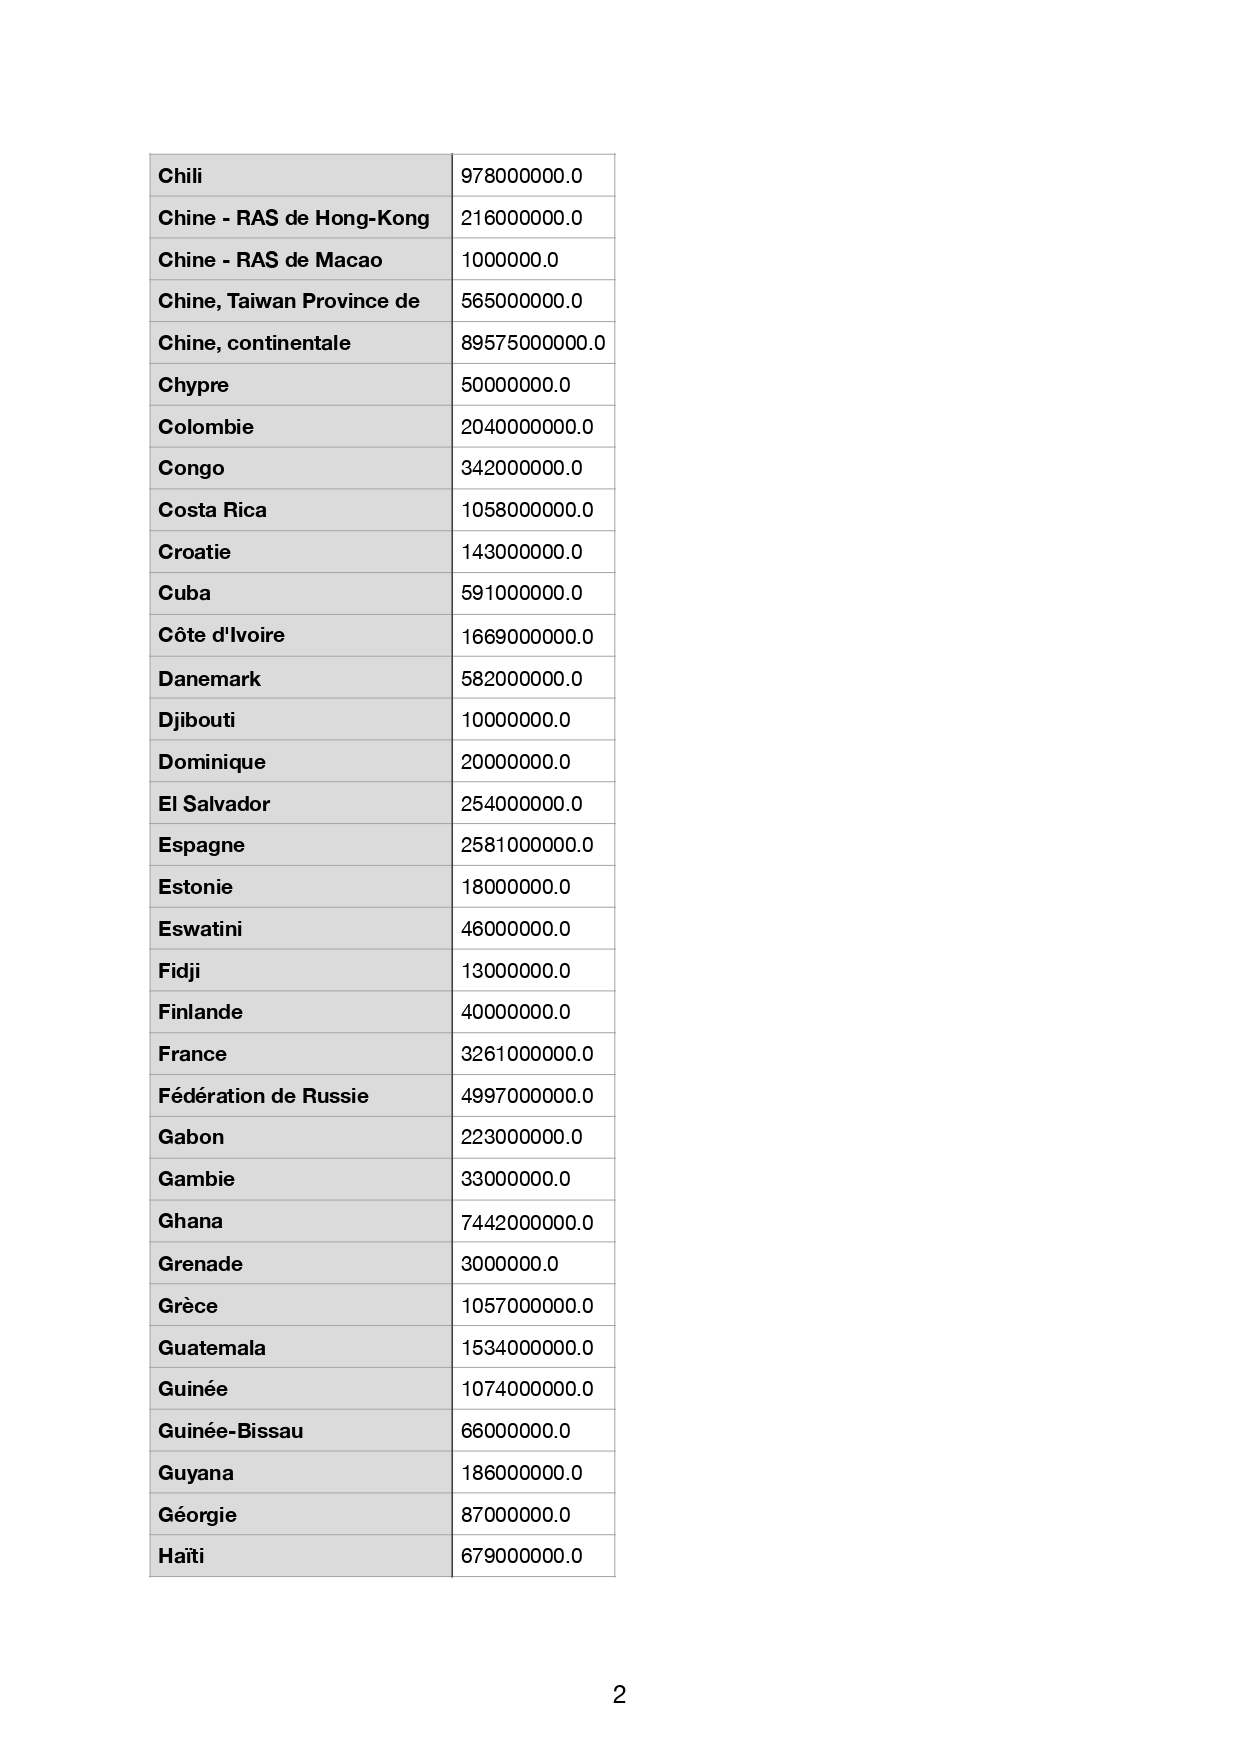

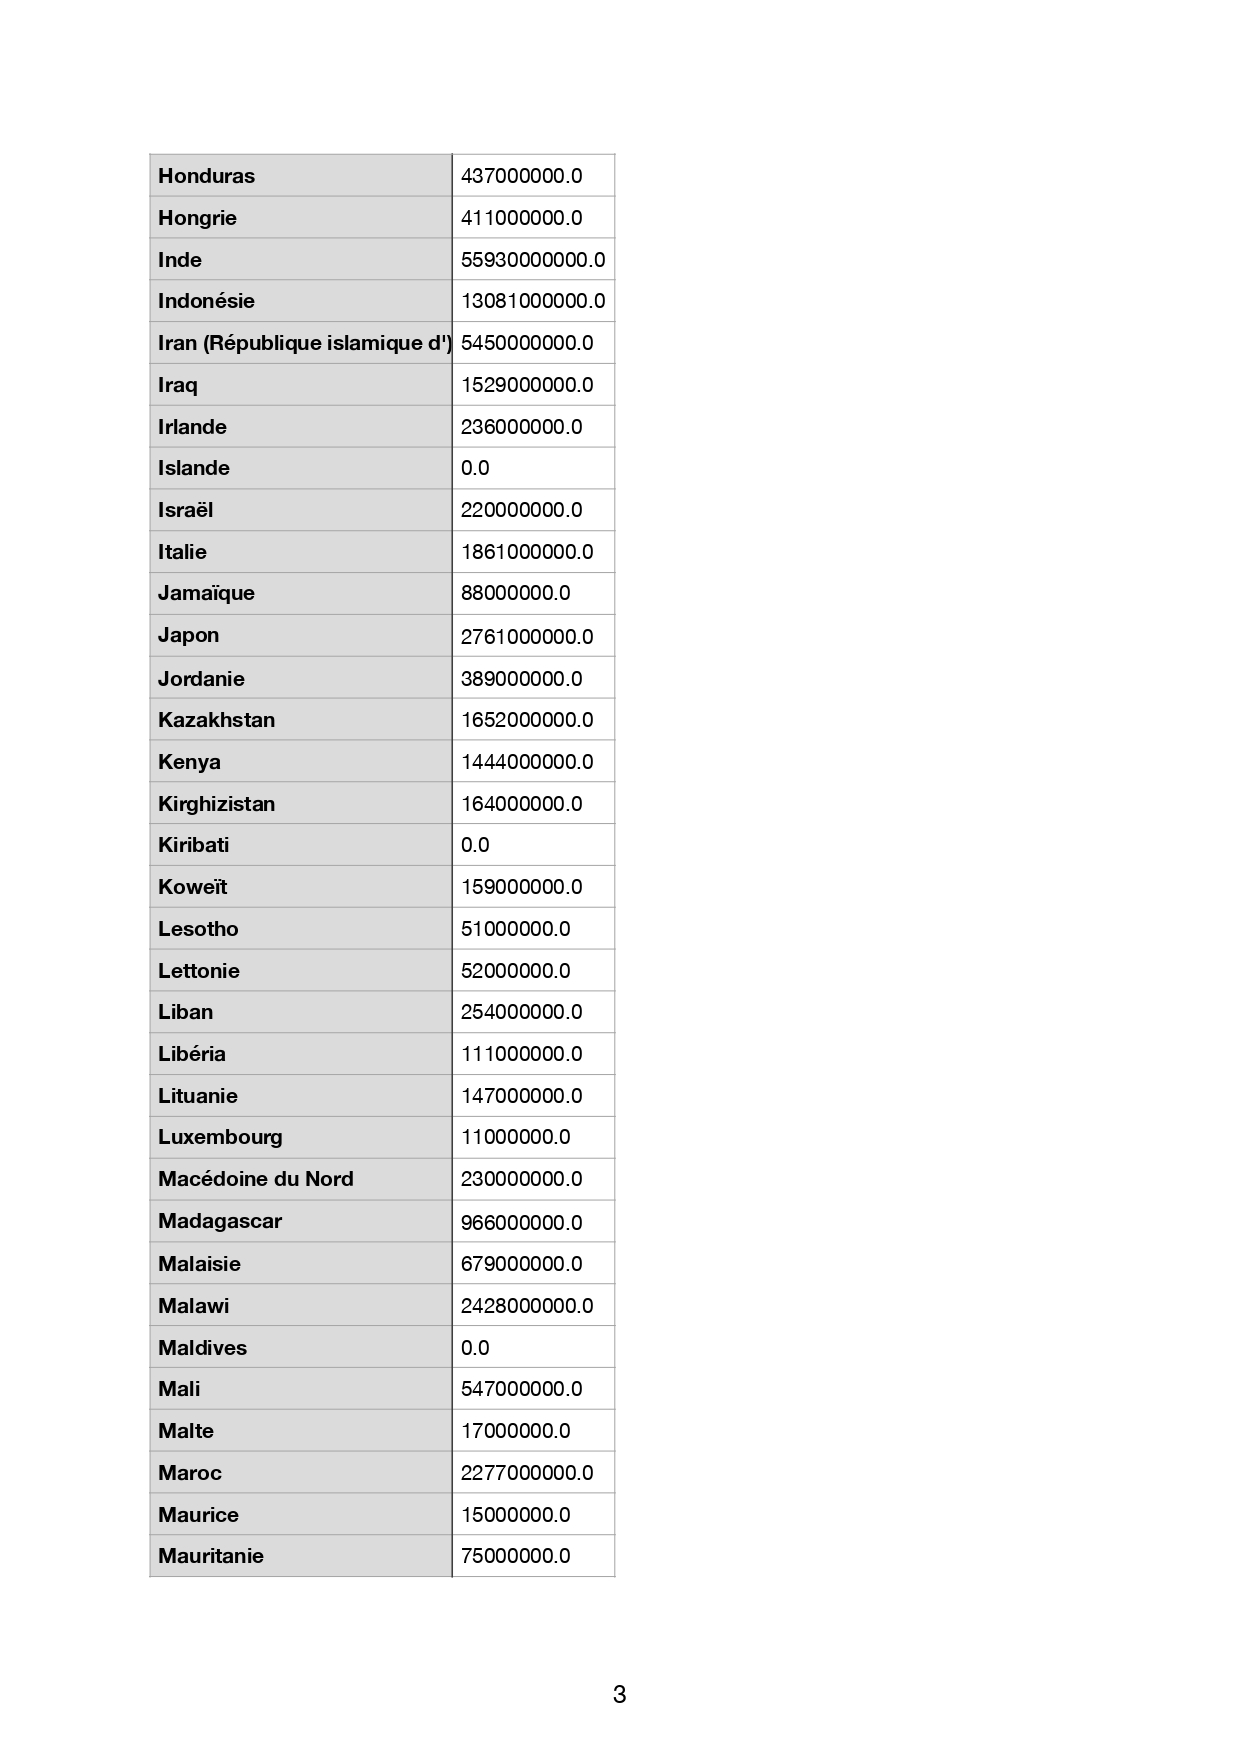

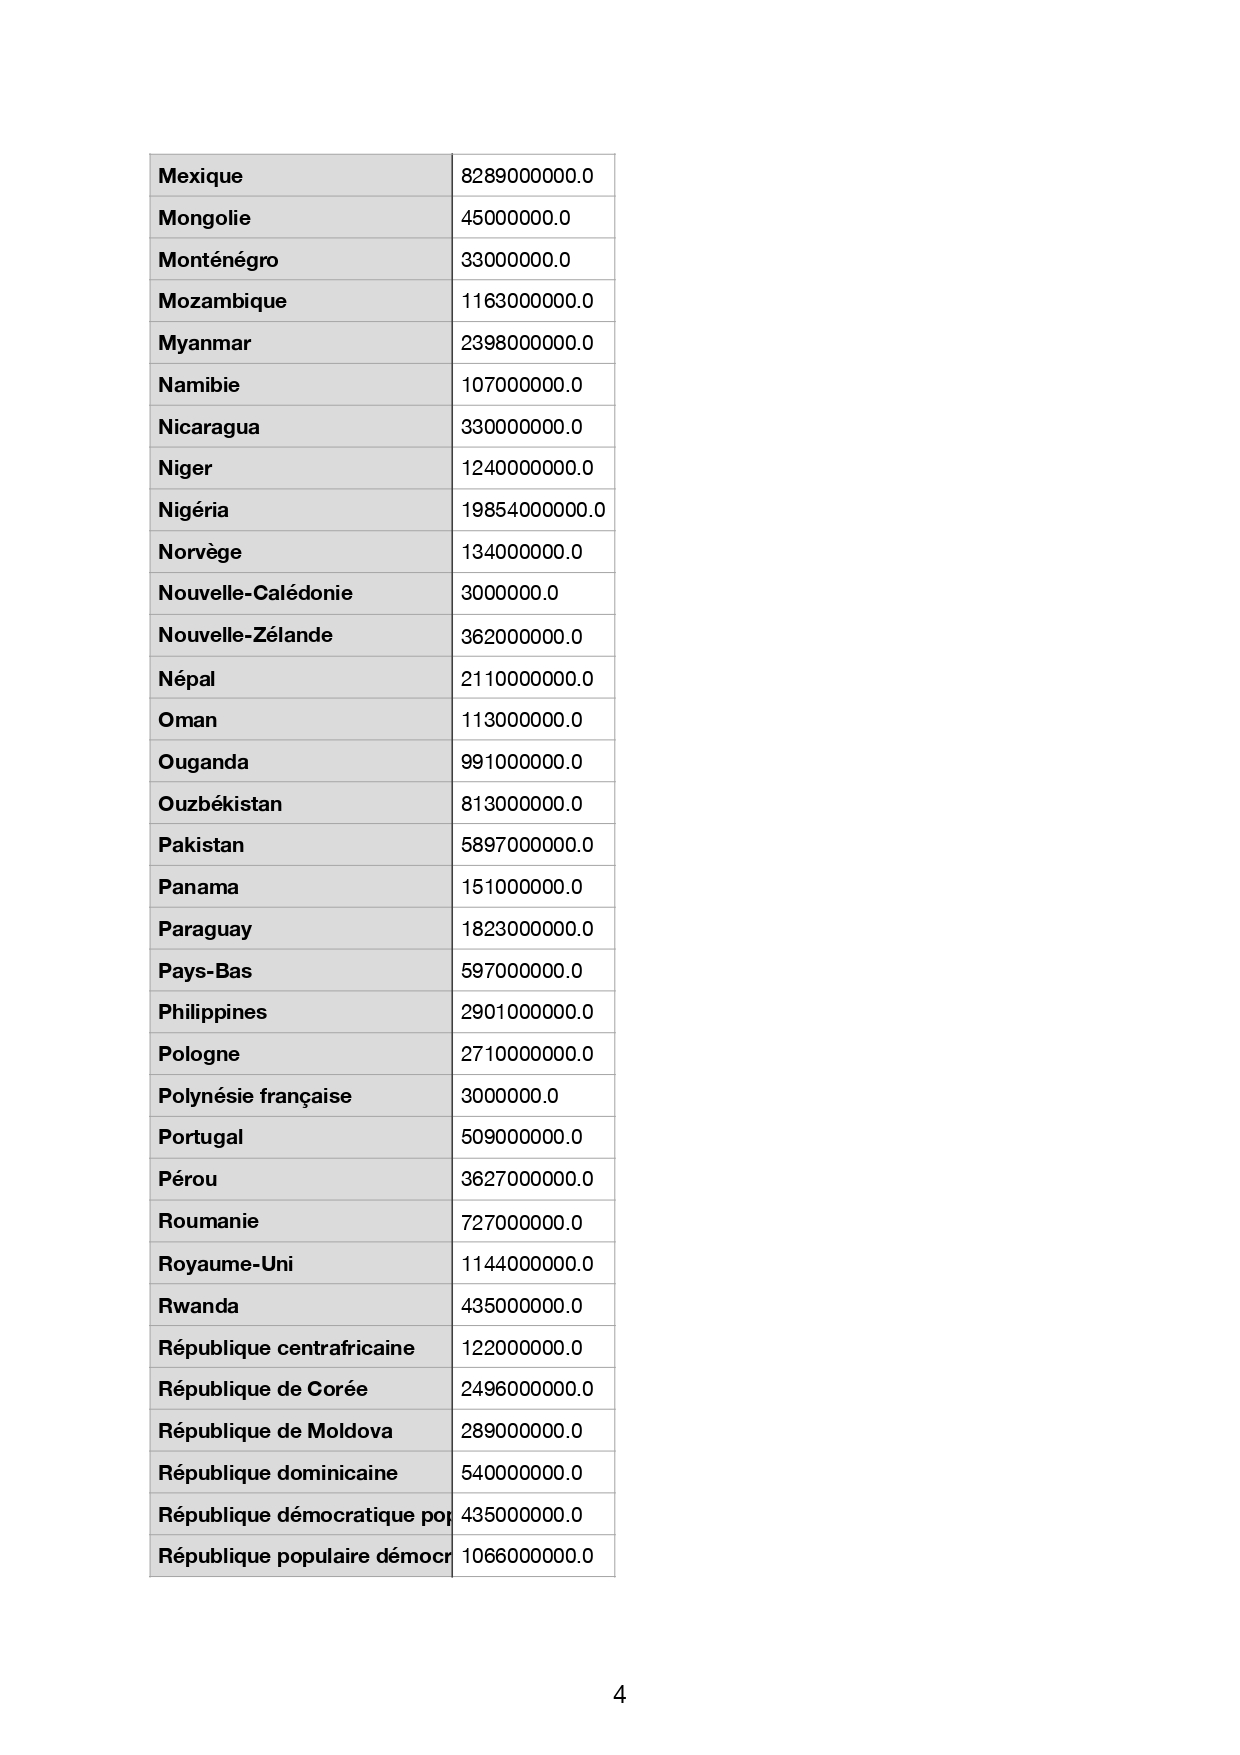

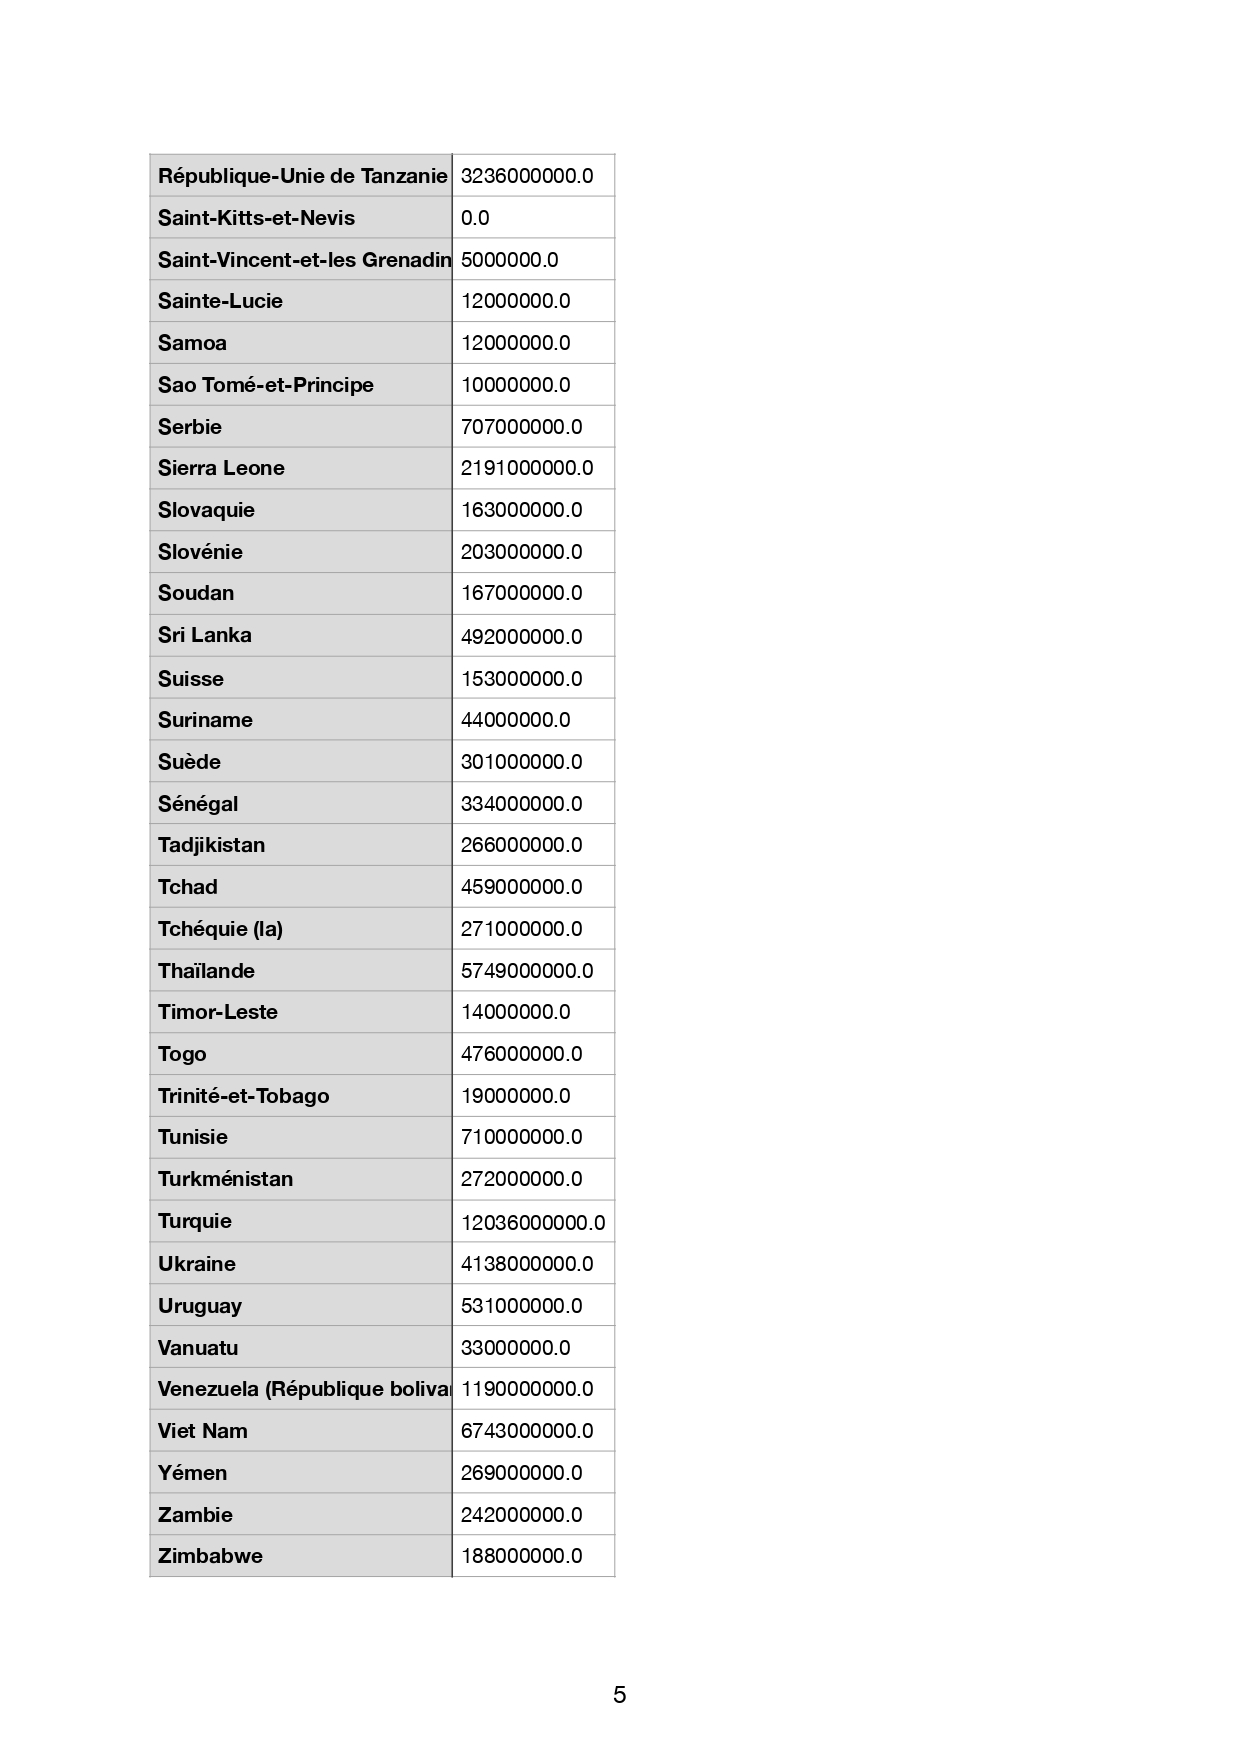

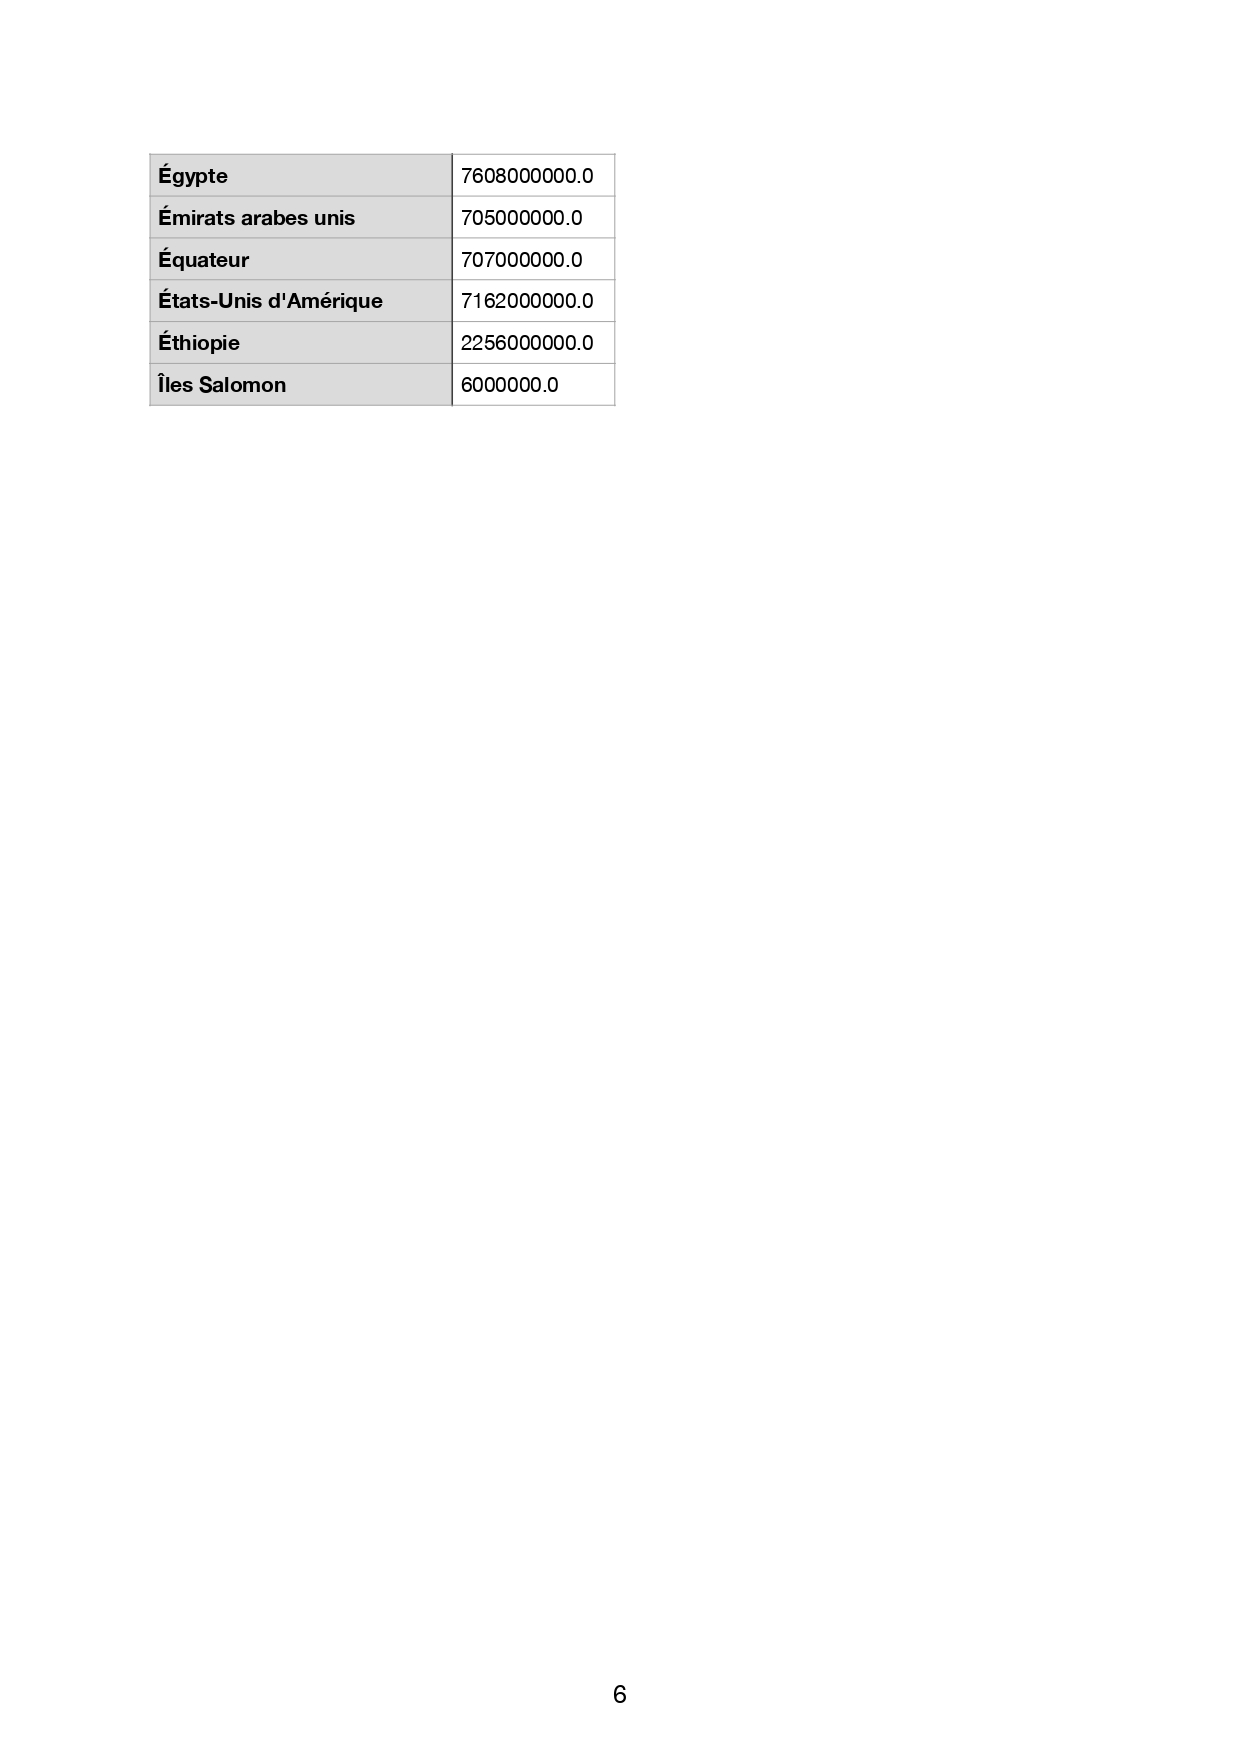

Les 10 pays pour lesquels la proportion de personnes sous-alimentées est la plus forte

 <font color='darkbleue'>SELECT</font> population.pays, (sous_nutrition.nb_personnes / population.population)  <font color='darkbleue'>AS</font> ratio  <font color='darkbleue'>FROM</font> sous_nutrition  <font color='darkbleue'>LEFT JOIN</font> population  <font color='darkbleue'>ON</font> population.pays = sous_nutrition.pays  <font color='darkbleue'>ORDER BY</font> ratio  <font color='darkbleue'>DESC LIMIT</font> 10 ;


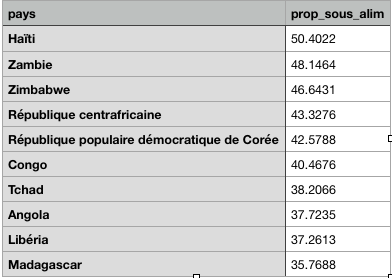

Les 10 produits pour lesquels le ratio Autres utilisations/Disponibilité intérieure est le plus élevé.

 <font color='darkbleue'>SELECT</font>  produit,  <font color='darkbleue'>AVG</font>(autres_utilisations / dispo_int)  <font color='darkbleue'>AS</font> ratio  <font color='darkbleue'>FROM</font> equilibre_prod  <font color='darkbleue'>GROUP BY</font> produit   <font color='darkbleue'>ORDER BY</font> ratio  <font color='darkbleue'>DESC LIMIT</font> 10;


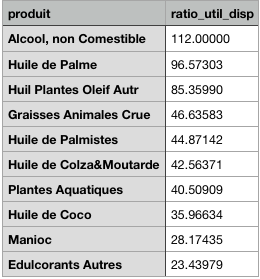

# Question 20 :

Les autres utilisations possibles sont pour les biocarburants et pour les produits cosmétiques .